In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
%matplotlib inline

## 1:
## NAME: Manas G Mutalikdesai
## SRN: PES1UG22CS327

## 2:
## NAME: Manisha Venkatesha
## SRN: PES1UG22CS333

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("titanic.csv")

## Question 1

### Defining the data types and the respective feature and then makinga dataframe. Then we have printed the dataframe to show the respective feature and it's type.

In [5]:
data_types = {
    "PassengerId": "Nominal",
    "Survived": "Nominal",
    "Pclass": "Ordinal",
    "Name": "Nominal",
    "Sex": "Nominal",
    "Age": "Ratio",
    "SibSp": "Ratio",
    "Parch": "Ratio",
    "Ticket": "Nominal",
    "Fare": "Ratio",
    "Cabin": "Nominal",
    "Embarked": "Nominal"
}

data_types_df = pd.DataFrame(data_types.items(), columns=["Feature", "Data Type"])

data_types_df

,Feature,Data Type
0,PassengerId,Nominal
1,Survived,Nominal
2,Pclass,Ordinal
3,Name,Nominal
4,Sex,Nominal
5,Age,Ratio
6,SibSp,Ratio
7,Parch,Ratio
8,Ticket,Nominal
9,Fare,Ratio


## Question 2

### Separating the datatypes, assigning Mode to the types which are not numerical and mean to numerical values.
### Then we are calculating the mean, SD and Range for numerical values.
### For non numerical it doesn not print the values.

In [6]:
summary_statistics = {}

for column in df.columns:
    if df[column].dtype == 'object':
        summary_statistics[column] = {
            'Measure of Central Tendency': 'Mode',
            'Value': df[column].mode().values[0]
        }
    else:
        
        summary_statistics[column] = {
            'Measure of Central Tendency': 'Mean',
            'Value': df[column].mean(),
            'Standard Deviation': df[column].std(),
            'Range': (df[column].min(), df[column].max())
        }

for column, stats in summary_statistics.items():
    print(f"Column: {column}")
    print(f"Measure of Central Tendency: {stats['Measure of Central Tendency']}")
    print(f"Value: {stats['Value']}")
    if 'Standard Deviation' in stats:
        print(f"Standard Deviation: {stats['Standard Deviation']}")
        print(f"Range: {stats['Range'][0]} - {stats['Range'][1]}")
    print()

Column: PassengerId
Measure of Central Tendency: Mean
Value: 446.0
Standard Deviation: 257.3538420152301
Range: 1 - 891

Column: Survived
Measure of Central Tendency: Mean
Value: 0.3838383838383838
Standard Deviation: 0.4865924542648575
Range: 0 - 1

Column: Pclass
Measure of Central Tendency: Mean
Value: 2.308641975308642
Standard Deviation: 0.836071240977049
Range: 1 - 3

Column: Name
Measure of Central Tendency: Mode
Value: Abbing, Mr. Anthony

Column: Sex
Measure of Central Tendency: Mode
Value: male

Column: Age
Measure of Central Tendency: Mean
Value: 29.69911764705882
Standard Deviation: 14.526497332334042
Range: 0.42 - 80.0

Column: SibSp
Measure of Central Tendency: Mean
Value: 0.5230078563411896
Standard Deviation: 1.1027434322934317
Range: 0 - 8

Column: Parch
Measure of Central Tendency: Mean
Value: 0.38159371492704824
Standard Deviation: 0.8060572211299483
Range: 0 - 6

Column: Ticket
Measure of Central Tendency: Mode
Value: 1601

Column: Fare
Measure of Central Tendency: 

## Question 3

## We have filtered out null values and then dropped the null values from the dataset.
## We have also removed duplicates from the dataset.
## Null values do not add anything so we drop it.

In [7]:
missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)

fare_99th_percentile = df['Fare'].quantile(0.99)
df.loc[df['Fare'] > fare_99th_percentile, 'Fare'] = fare_99th_percentile

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

df.to_csv("cleaned_titanic_dataset.csv", index=False)

print("Missing Values:")
print(missing_values)

print("\nDuplicate Rows:")
print(duplicates)

print("\nSummary Statistics:")
print(df.describe())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicate Rows:
0

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean    

## Question 4

### We have dropped all the null values from the dataset and then plotted a histogram and box plot.
### These plots show that the age group 30 is the most occuring and the least fares have the highest frequency.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

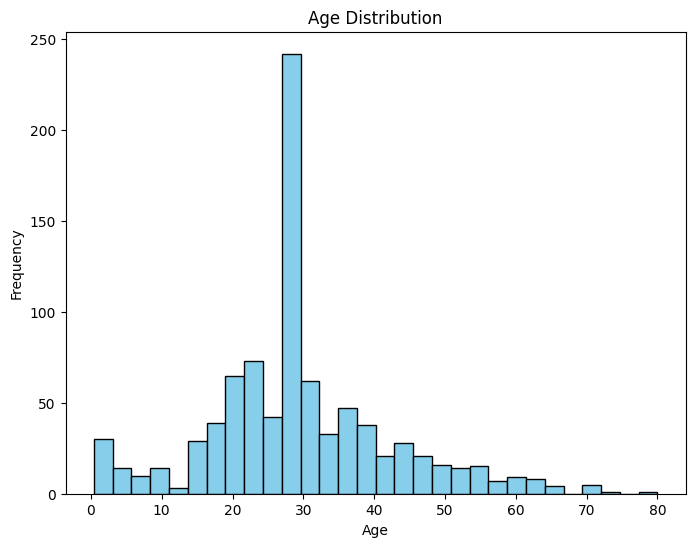

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

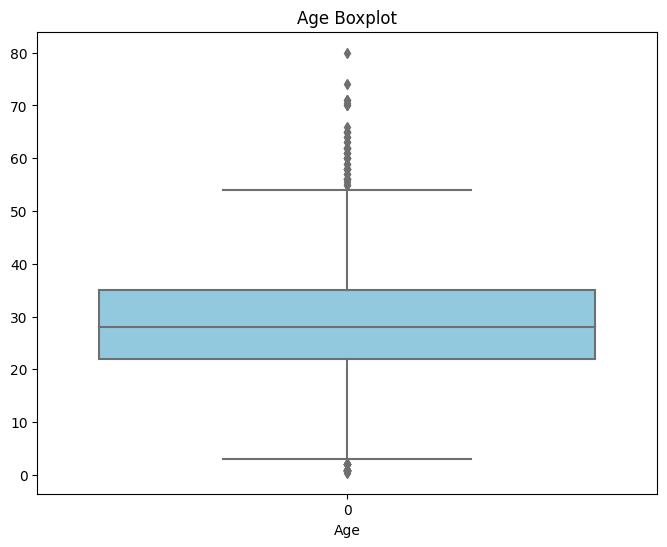

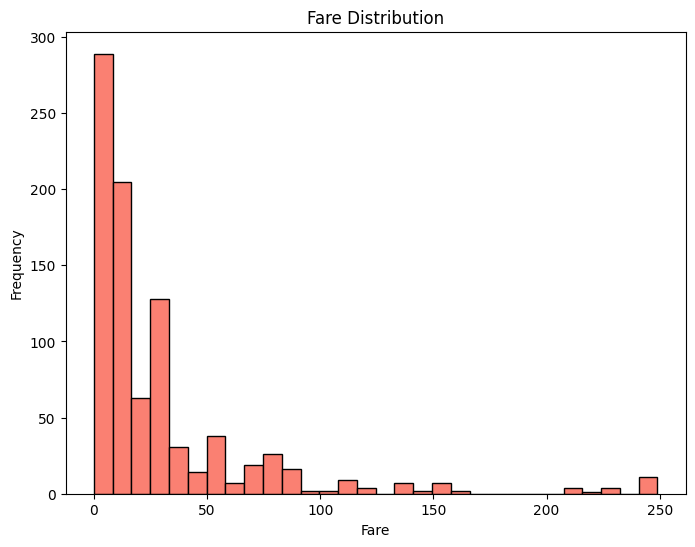

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

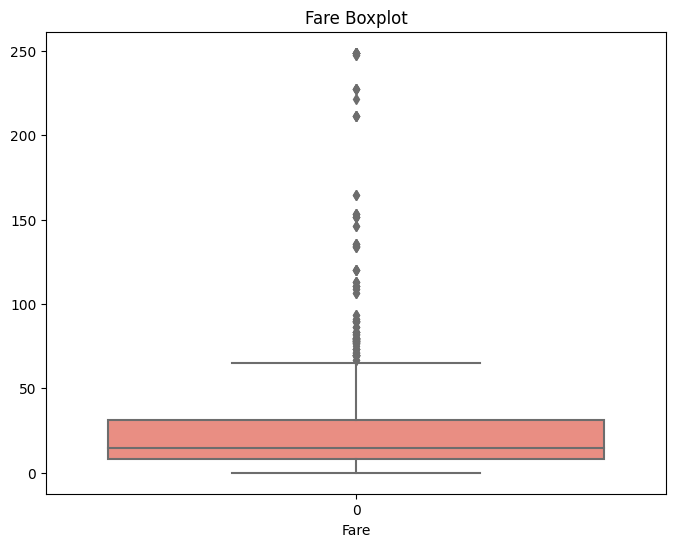

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['Age'].dropna(), color='skyblue')
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df['Fare'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['Fare'].dropna(), color='salmon')
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()

## Question 5

### We have calculated the Q1 Q3 and IQR for both fare and age and then removed outliers.
### We have checked if the data values belong in the range of boxplot and removed the ones that don't(Outliers)
### Then we plotted it again and the changes with the filtered dataset has been plotted again
### The Median has dropped by a very less value for age and fare.
### But the number of outliers with the new values has increased

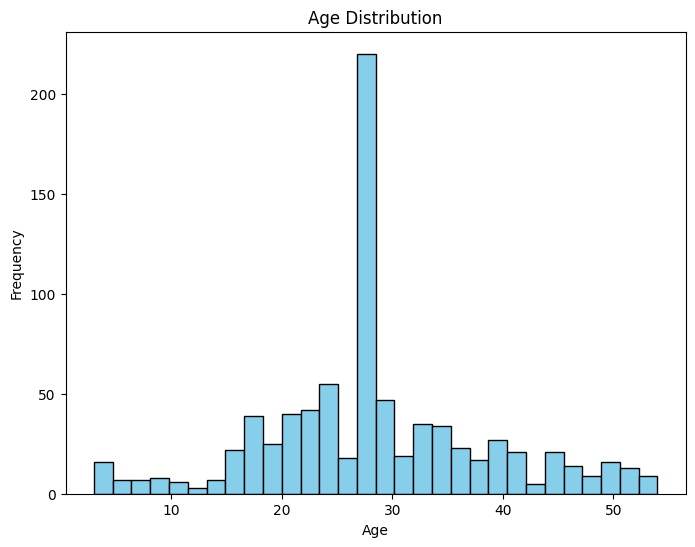

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

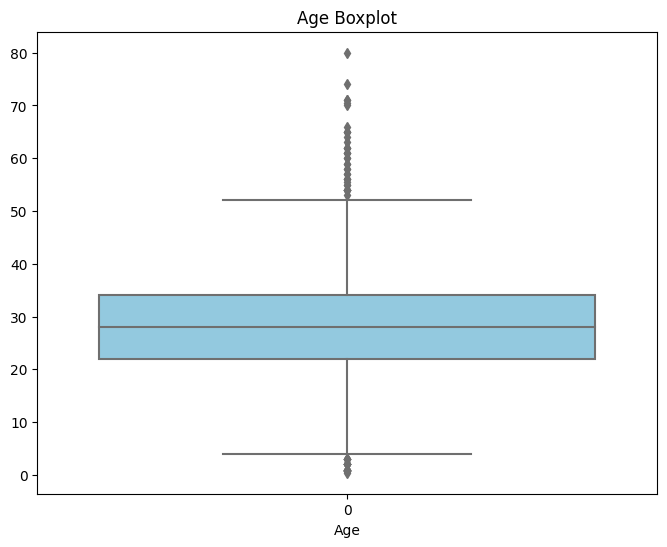

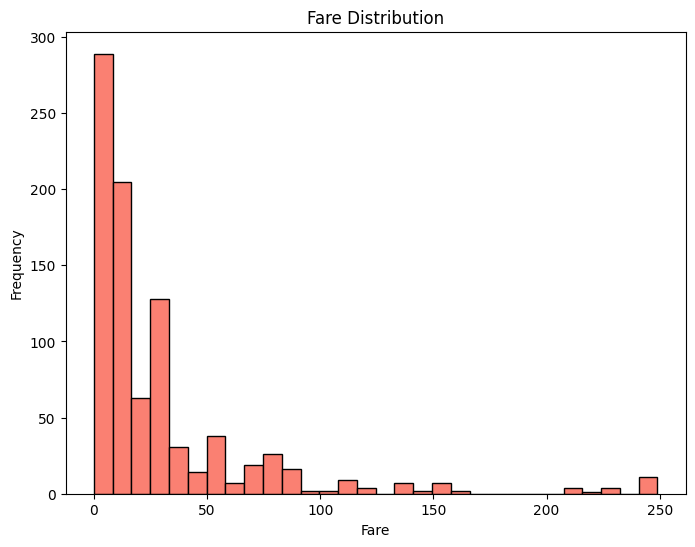

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

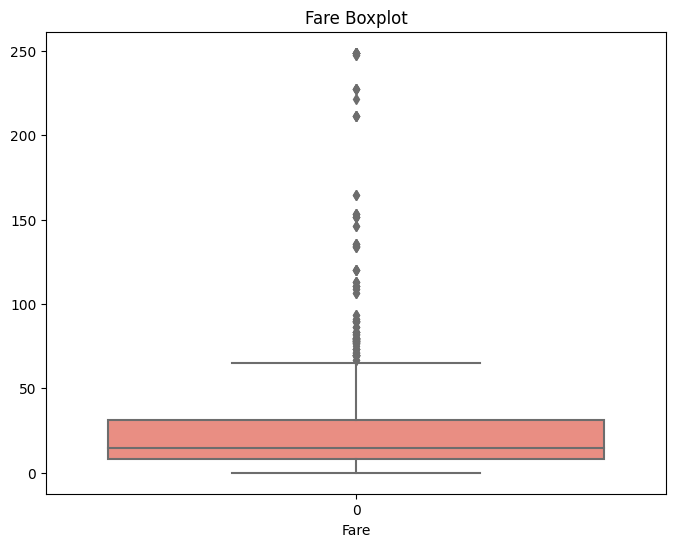

In [10]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

df_without_age_outliers = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]
df_without_fare_outliers = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

plt.figure(figsize=(8, 6))
plt.hist(df_without_age_outliers['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df_without_fare_outliers['Age'].dropna(), color='skyblue')
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df['Fare'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['Fare'].dropna(), color='salmon')
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()

## Question 6

### There is an irregularity in the linearity of the graph and therefore we can say that the data does not follow normality.
### The graph is not diagonally linear therefore would not follow the diagonal line and hence we can that it does not follow normal probability. 
### The data is right skewed

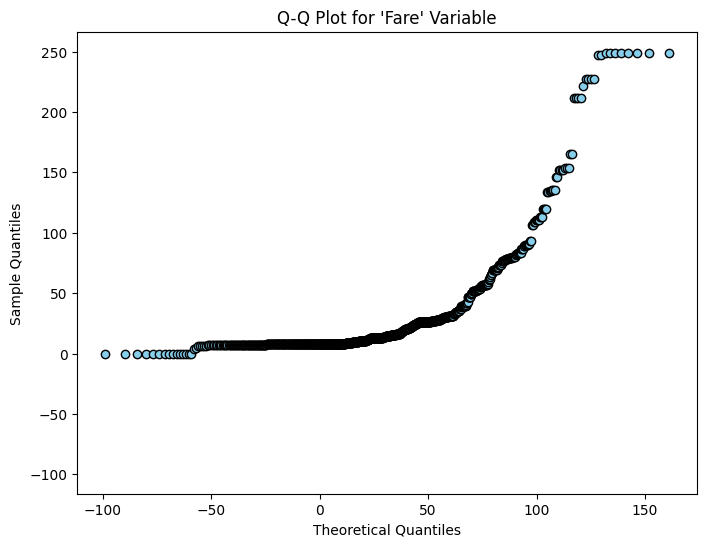

In [13]:
fare_values = df['Fare'].dropna()

sorted_fares = np.sort(fare_values)
n = len(sorted_fares)
percentiles = np.arange(1, n + 1) / n
theoretical_quantiles = stats.norm.ppf(percentiles, loc=np.mean(sorted_fares), scale=np.std(sorted_fares))

plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, sorted_fares, color='skyblue', edgecolor='black')
plt.title("Q-Q Plot for 'Fare' Variable")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.plot([np.min(theoretical_quantiles), np.max(theoretical_quantiles)], [np.min(theoretical_quantiles), np.max(theoretical_quantiles)], color='red', linestyle='--')
plt.show()

## Question 7

### We have taken only numerical values fron the dataset and plotted heatmaps for them(Since survived is categorical we have not considered it).
### The heat map shows the correlation of one property with the other numerical properties.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

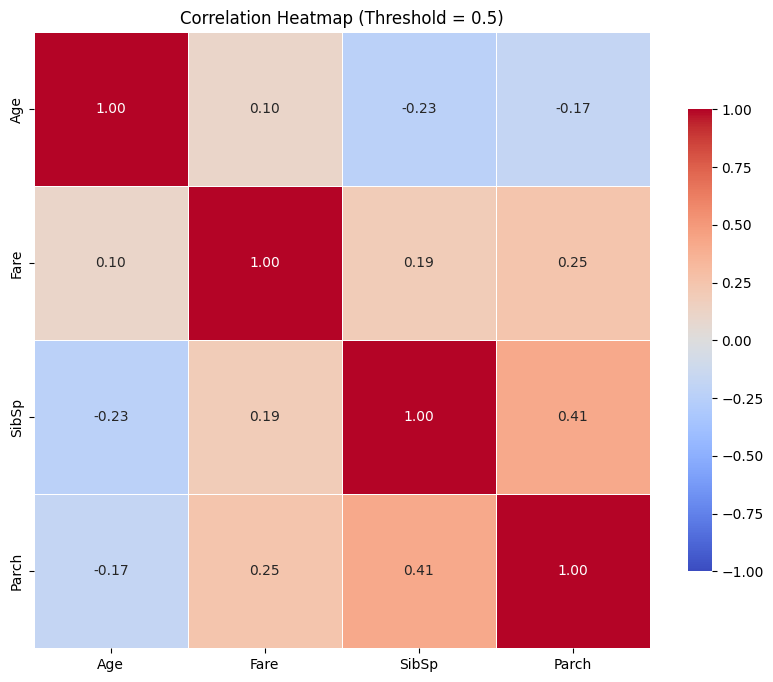

In [15]:
numerical_variables = ['Age', 'Fare', 'SibSp', 'Parch']

correlation_matrix = df[numerical_variables].corr()

correlation_threshold = 0.5

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
plt.title(f'Correlation Heatmap (Threshold = {correlation_threshold})')
plt.show()

## Question 8

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

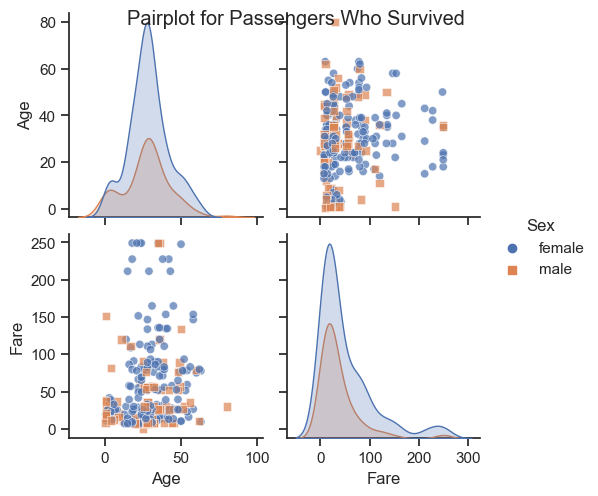

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Framewor

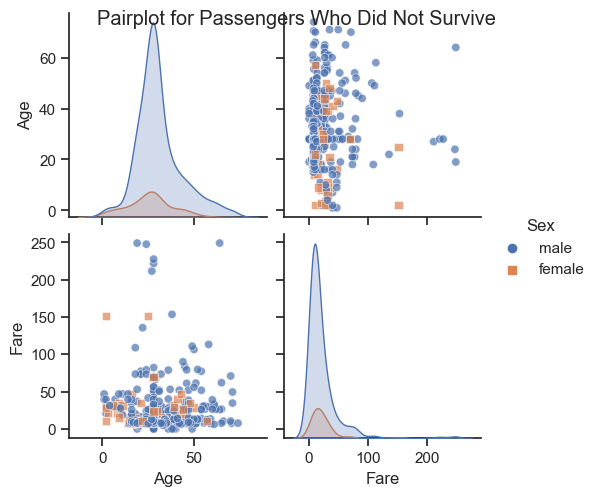

In [16]:
survived_df = df[df['Survived'] == 1]
sns.set(style="ticks")
sns.pairplot(survived_df, vars=['Age', 'Fare'], hue='Sex', markers=['o', 's'], plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot for Passengers Who Survived")
plt.show()

# Pairplot for passengers who did not survive
not_survived_df = df[df['Survived'] == 0]
sns.set(style="ticks")
sns.pairplot(not_survived_df, vars=['Age', 'Fare'], hue='Sex', markers=['o', 's'], plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot for Passengers Who Did Not Survive")
plt.show()

## Question 9

### We have calculated the Pvalue for the data and also the t statistic.
### Since we the P value is lesser than the memtioned threshold of 0.05 we can reject the null hypothesis.
### There is not much relation between fare and survival and hence we can reject the null hypothesis.

T-statistic: 7.542761847465439
P-value: 2.2704225009774703e-13
Reject the null hypothesis. There is a significant impact of fare on survival chances.


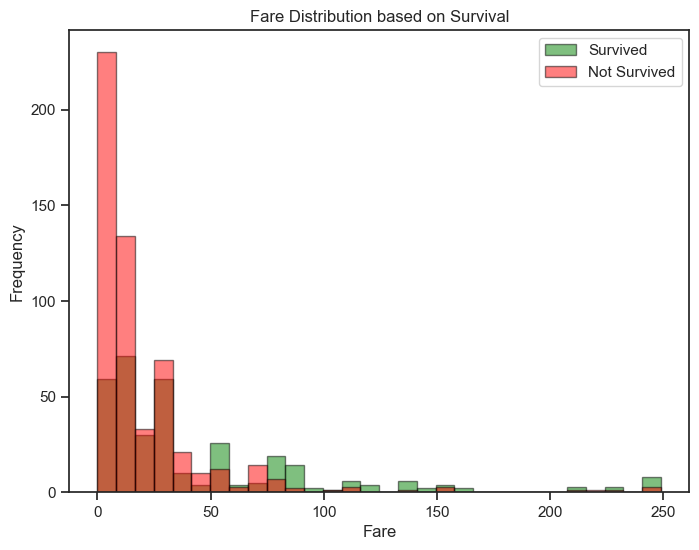

In [17]:
survived_fares = df[df['Survived'] == 1]['Fare'].dropna()
not_survived_fares = df[df['Survived'] == 0]['Fare'].dropna()

t_stat, p_value = stats.ttest_ind(survived_fares, not_survived_fares, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant impact of fare on survival chances.")
else:
    print("Fail to reject the null hypothesis. There is no significant impact of fare on survival chances.")

plt.figure(figsize=(8, 6))
plt.hist(survived_fares, bins=30, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(not_survived_fares, bins=30, alpha=0.5, label='Not Survived', color='red', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.title('Fare Distribution based on Survival')
plt.show()

## Question 10

### We have calculated the criticla value for the dataset using scipy.stats
### Then we have calculated variance using numpy function.
### We found out standard error using these 2.
### We multiplied the critical value and the standard error together to find out margin error.

In [18]:
n_survived = len(survived_fares)
n_not_survived = len(not_survived_fares)
var_survived = np.var(survived_fares, ddof=1)
var_not_survived = np.var(not_survived_fares, ddof=1)

degrees_of_freedom = min(n_survived - 1, n_not_survived - 1)

critical_value = stats.t.ppf(1 - alpha / 2, df=degrees_of_freedom)

standard_error = np.sqrt(var_survived / n_survived + var_not_survived / n_not_survived)

margin_of_error = critical_value * standard_error

print("Margin of Error:", margin_of_error)

Margin of Error: 6.2216765283418285
